# Tensorflow not on Apache Spark

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

/home/nirali/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from time import time

# Starting the time for calculating the time for the entire process

In [4]:
tick = time()

# Importing the MNIST dataset

In [5]:
mnist  = input_data.read_data_sets("/tmp/data",one_hot =True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [6]:
type(mnist)



tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [7]:
mnist.train.images.shape

(55000, 784)

In [8]:
sample  = mnist.train.images[2].reshape(28,28)

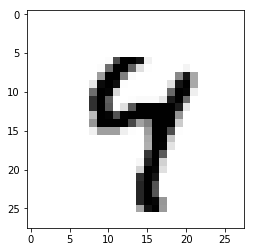

In [9]:
plt.imshow(sample,cmap ='Greys')

Choosing the best hyperparameters

In [10]:
learning_rate = 0.005
training_epochs = 15
batch_size = 100
n_classes = 10
n_samples = mnist.train.num_examples
n_input  = 784
n_hidden_1 = 1024
n_hidden_2 = 1024
n_output =10

In [11]:
def multilayer_perceptron(x,weights,biases):
    
    '''
    x:Placeholder for data input
    weights : dictionary for weights
    biases : dict of bias values
    '''
    #First hidden Layer activation RELU activation 
    #x*w + bias
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    # RELU(x*w+bias) -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1) 
    
    
    #Second hidden layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2) 
    
    #Output layer
    out_layer = tf.matmul(layer_2,weights['out']) + biases['out']
    
    return out_layer

In [12]:
weights = {
    
    'h1': tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2,n_output]))
    
}
    


In [13]:
biases = {
    
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_output]))
    
}

In [14]:
x = tf.placeholder('float',[None,n_input])
y = tf.placeholder('float',[None,n_output])

In [15]:
pred  =  multilayer_perceptron(x,weights,biases)

In [16]:
cost  = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))


In [17]:
optimizer  = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

# Training the data

In [18]:
t = mnist.train.next_batch(1)

In [19]:
print(t)

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0. 

In [20]:
Xsamp, ysamp = t

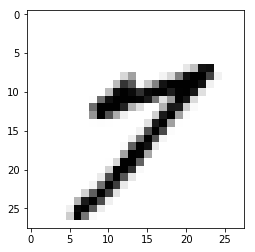

In [21]:
plt.imshow(Xsamp.reshape(28,28), cmap='Greys')

In [22]:
ysamp

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

# Run the Session

In [23]:
sess = tf.InteractiveSession()

In [24]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [25]:
sess.run(init)

# Calculating the cost and Accuracy 

In [26]:
for epoch in range(training_epochs):
    avg_cost = 0.0
    total_batch = int(n_samples/batch_size)
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _,c = sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        avg_cost += c/total_batch
    print("Epoch : {} cost{:.4f}".format(epoch+1,avg_cost))
print("MOdel has completed {} Epochs of training".format(training_epochs))

Epoch : 1 cost235.0849
Epoch : 2 cost48.1637
Epoch : 3 cost24.5445
Epoch : 4 cost15.9796
Epoch : 5 cost12.7067
Epoch : 6 cost11.1966
Epoch : 7 cost10.3703
Epoch : 8 cost9.1342
Epoch : 9 cost8.1800
Epoch : 10 cost8.2314
Epoch : 11 cost7.3928
Epoch : 12 cost6.5862
Epoch : 13 cost5.4383
Epoch : 14 cost5.6488
Epoch : 15 cost5.5258
MOdel has completed 15 Epochs of training


In [27]:
correct_prediction = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [28]:
correct_prediction = tf.cast(correct_prediction , 'float')

In [29]:
print(correct_prediction[0])

Tensor("strided_slice:0", shape=(), dtype=float32)


In [30]:
accuracy = tf.reduce_mean(correct_prediction)

In [31]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [32]:
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [33]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.9713

# Noting the end time for the process 

In [34]:
tock = time()

In [35]:
print(tock - tick)

571.2699296474457


Cons:

1) The total time taken is more than the time taken for Tensorflow use on Spark
2) The original TensorFlow project doesn’t support Remote direct memory access as a core feature which leads to low throghput and high latency